# Project 1 - Penguin Dataset

<h3> Taswar Karim  </h3>

<h5> We will start by loading the penguin dataset into the notebook </h5>
<h5>....and begin our exploratory data analysis </h5>


In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import joblib
from time import time
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import ShuffleSplit

%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


penguins = pd.read_csv('penguins_size.csv')
penguins.head(100)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
95,Adelie,Dream,40.8,18.9,208.0,4300.0,MALE
96,Adelie,Dream,38.1,18.6,190.0,3700.0,FEMALE
97,Adelie,Dream,40.3,18.5,196.0,4350.0,MALE
98,Adelie,Dream,33.1,16.1,178.0,2900.0,FEMALE


<h4> Lets take a closer look at the datasets to get more insights </h4>

In [65]:
penguins.describe()
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## Observation 1 ##
Looking at the information above, we note that there are 10 objects missing within 'sex' and 2 missing values for culmen_length_mm, culmen depth_mm, flipper_length_mm & body_mass_g. Upon looking further we see there is a gender column with '.' instead of male/female

## Observation 2 ##
From the information above, we can conclude that Adelie on average have a lower culmen length than the other two species. However we can observe that despite having similar average culmen length between Chinstrap and Gentoo , the latter seems to have a much bigger body mass and a substantial longer flipper length

Lets plot a few graphs to examine our Observation #2

Text(0, 0.5, 'Body Mass')

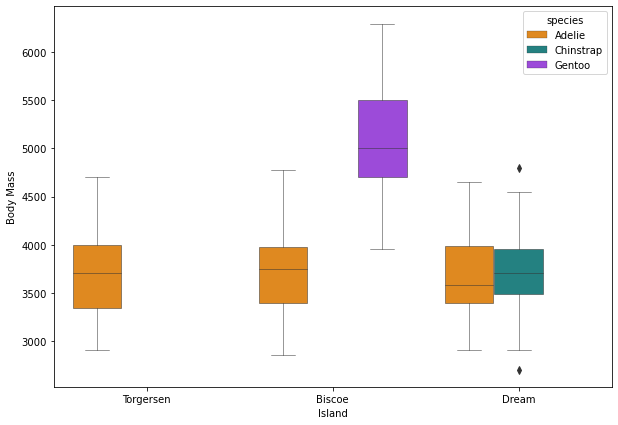

In [4]:
plt.figure(figsize = [10,7])
bm_species = sns.boxplot(x = 'island', y ='body_mass_g', hue = 'species', data = penguins, palette=['#FF8C00','#159090','#A034F0'], linewidth=0.5)
bm_species.set_xlabel('Island')
bm_species.set_ylabel('Body Mass')

Lets do a lineplot to differentiate flipper length of different species of penguins 


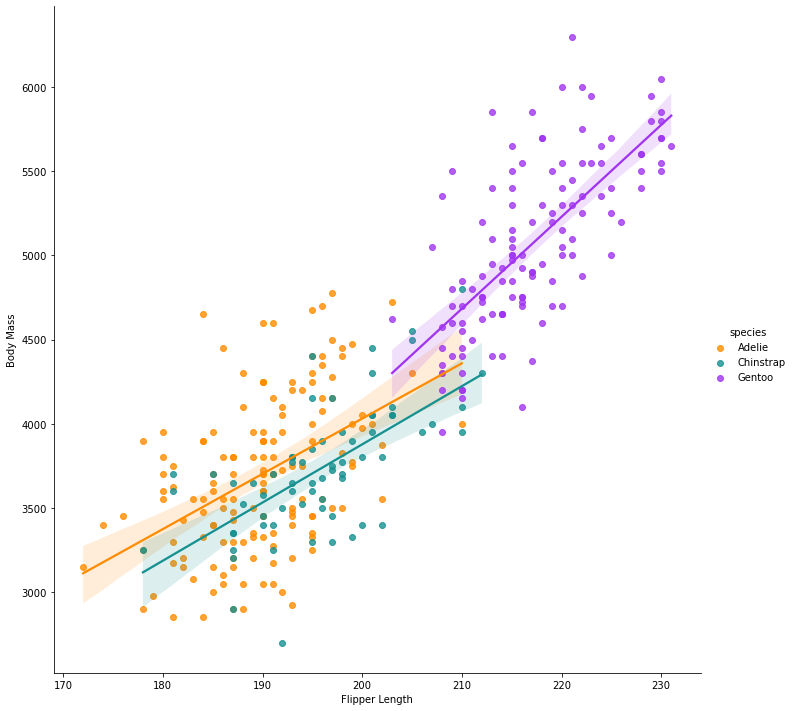

In [5]:
flipper_species = sns.lmplot(x="flipper_length_mm", y="body_mass_g", hue="species", height=10, data=penguins, palette=['#FF8C00','#159090','#A034F0'])
flipper_species.set_xlabels('Flipper Length')
flipper_species.set_ylabels('Body Mass')

In [6]:
penguins['island'].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [7]:
penguins.pivot_table('sex', index='species', columns='island', aggfunc='count')

island,Biscoe,Dream,Torgersen
species,,,
Adelie,44.0,55.0,47.0
Chinstrap,NaN,68.0,NaN
Gentoo,120.0,NaN,NaN


# Observation 3 #
From the observation above, it seems 'Gentoo' species are only found on the Biscoe island and 'Chinstrap' species are only found on Dream Island whereas 'Adelie' species are found in all 3 islands. 

# Realization #
It seems pretty clear that according to our data each penguin species is easily distinguishable from the island it comes from. One thought is that if the penguin is from Biscoe, that eliminates its chance for being a Chinstrap penguin (It must be either Adelie or Gentoo specie), alternatively if the penguin is from Dream island, it can not be a Gentoo as they do not seem to exist in that island (It must be either Adelie or Chinstrap). According to our observation #2 Adelie penguin species have a much lower average culmen length which distinguishes it from the other species. So according to the data the 2 most important feature to look at in order to classify the class of penguin could be the Island and culmen length but ofcourse we must take the other datas into account as well if we are to make a more accurate prediction. Thankfully, our ML algorithms are there to help us with it.

Lets take a look if each penguin species gender have any distinguishable feature

In [8]:
penguins.pivot_table('body_mass_g', index='sex', columns='species')

species,Adelie,Chinstrap,Gentoo
sex,,,
.,NaN,NaN,4875.000000
FEMALE,3368.835616,3527.205882,4679.741379
MALE,4043.493151,3938.970588,5484.836066


In [9]:
penguins.pivot_table('culmen_length_mm', index='sex', columns='species')

species,Adelie,Chinstrap,Gentoo
sex,,,
.,NaN,NaN,44.500000
FEMALE,37.257534,46.573529,45.563793
MALE,40.390411,51.094118,49.473770


In [10]:
penguins.pivot_table('culmen_depth_mm', index='sex', columns='species')

species,Adelie,Chinstrap,Gentoo
sex,,,
.,NaN,NaN,15.700000
FEMALE,17.621918,17.588235,14.237931
MALE,19.072603,19.252941,15.718033


In [11]:
penguins.pivot_table('flipper_length_mm', index='sex', columns='species')

species,Adelie,Chinstrap,Gentoo
sex,,,
.,NaN,NaN,217.000000
FEMALE,187.794521,191.735294,212.706897
MALE,192.410959,199.911765,221.540984


In [12]:
penguins.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [13]:
penguins[penguins['sex'].isnull() == True]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


We found the missing values for some of our datas above. The way we want to handle missing values is to fill Row 3 and 339 with the average values for culmen_length_mm, culmen_depth_mm, flipper_length_mm & body_mass_g. As for sex we want to input 'female' and 'male' based on the body mass of the penguin. The way we want to do that is by finding the midpoint between the average body mass between male and female penguin for each species and using that midpoint as the criteria to fill our penguin's gender.

In [14]:
penguins = penguins.dropna(subset=['flipper_length_mm'], how='all')
penguins


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [15]:
penguins[penguins['sex'].isnull() == True]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN


In [16]:
penguins.pivot_table('body_mass_g', index='sex', columns='species')

species,Adelie,Chinstrap,Gentoo
sex,,,
.,NaN,NaN,4875.000000
FEMALE,3368.835616,3527.205882,4679.741379
MALE,4043.493151,3938.970588,5484.836066


In [17]:
penguins[penguins['sex'] == '.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [18]:
empty_sex_record = penguins.iloc[335]
empty_sex_record['sex'] = 'FEMALE'
empty_sex_record
penguins.iloc[335] = empty_sex_record

/Users/taswarkarim/opt/anaconda3/lib/python3.9/site-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


Rationale: Looking at the number of missing data and the available data for average body mass between the male and female penguins we notice that most of the penguins with missing 'sex' data were more likely to be female based on the values recorded for their body mass. Since we only have 8 missing 'sex' data we will decide to fill them with 'Female'

In [19]:
penguins = penguins.fillna('FEMALE')
penguins

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [20]:
penguins.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Now we have a complete dataset with no missing values. However, in order for a proper prediction we must ensure that our categorical attributes to binary attributes.

In [21]:
gender_num = {'MALE' : 0, 'FEMALE' : 1}

penguins['sex'] = penguins['sex'].map(gender_num)
penguins

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,1
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,1
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,1


In [22]:
island_num = {'Torgersen' : 0, 'Biscoe' : 1, 'Dream' : 2}
penguins['island'] = penguins['island'].map(island_num)
penguins

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,0,39.1,18.7,181.0,3750.0,0
1,Adelie,0,39.5,17.4,186.0,3800.0,1
2,Adelie,0,40.3,18.0,195.0,3250.0,1
4,Adelie,0,36.7,19.3,193.0,3450.0,1
5,Adelie,0,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...,...,...
338,Gentoo,1,47.2,13.7,214.0,4925.0,1
340,Gentoo,1,46.8,14.3,215.0,4850.0,1
341,Gentoo,1,50.4,15.7,222.0,5750.0,0
342,Gentoo,1,45.2,14.8,212.0,5200.0,1


In [23]:
penguins.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [24]:
penguins.dropna(inplace=True)

<h4> Splitting the data into Training, Validation and Test Sets </h4>

For the 60-20-20 Split : We divide data sets to 60% training, 20% test & 20% validation under y_train1, y_val1 and y_test1

For the 80-10-10 Split : We divide data sets to 80% training, 10% test & 10% validation under y_train2, y_val2 and y_test2

In [25]:
features = penguins.drop('species', axis=1)
labels = penguins['species']

X_train1, X_test1, y_train1, y_test1 = train_test_split(features, labels, test_size=0.4, random_state=42)
X_test1, X_val1, y_test1, y_val1 = train_test_split(X_test1, y_test1, test_size=0.5, random_state=42)

X_train2, X_test2, y_train2, y_test2 = train_test_split(features, labels, test_size=0.2, random_state=42)
X_test2, X_val2, y_test2, y_val2 = train_test_split(X_test2, y_test2, test_size=0.5, random_state=42)

In [26]:
for dataset in [y_train1, y_val1, y_test1, y_train2, y_val2, y_test2]:
    print(round(len(dataset) / len(labels), 2))

0.6
0.2
0.2
0.8
0.1
0.1


Now we write out the data for the splits 60-20-20 and 80-10-10 to csv files

In [27]:
X_train1.to_csv('./train_features.csv', index=False)
X_val1.to_csv('./val_features.csv', index=False)
X_test1.to_csv('./test_features.csv', index=False)
X_train2.to_csv('./train_features2.csv', index=False)
X_val2.to_csv('./val_features2.csv', index=False)
X_test2.to_csv('./test_features2.csv', index=False)



y_train1.to_csv('./train_labels.csv', index=False)
y_val1.to_csv('./val_labels.csv', index=False)
y_test1.to_csv('./test_labels.csv', index=False)
y_train2.to_csv('./train_labels2.csv', index=False)
y_val2.to_csv('./val_labels2.csv', index=False)
y_test2.to_csv('./test_labels2.csv', index=False)

In [28]:
tr_features = pd.read_csv('train_features.csv')
tr_features2 = pd.read_csv('train_features2.csv')
tr_labels = pd.read_csv('train_labels.csv')
tr_labels2 = pd.read_csv('train_labels2.csv')
test_features = pd.read_csv('test_features.csv')
test_features2 = pd.read_csv('test_features2.csv')
test_labels = pd.read_csv('test_labels.csv')
test_labels2 = pd.read_csv('test_labels2.csv')
val_features = pd.read_csv('val_features.csv')
val_features2 = pd.read_csv('val_features2.csv')
val_labels = pd.read_csv('val_labels.csv')
val_labels2 = pd.read_csv('val_labels2.csv')



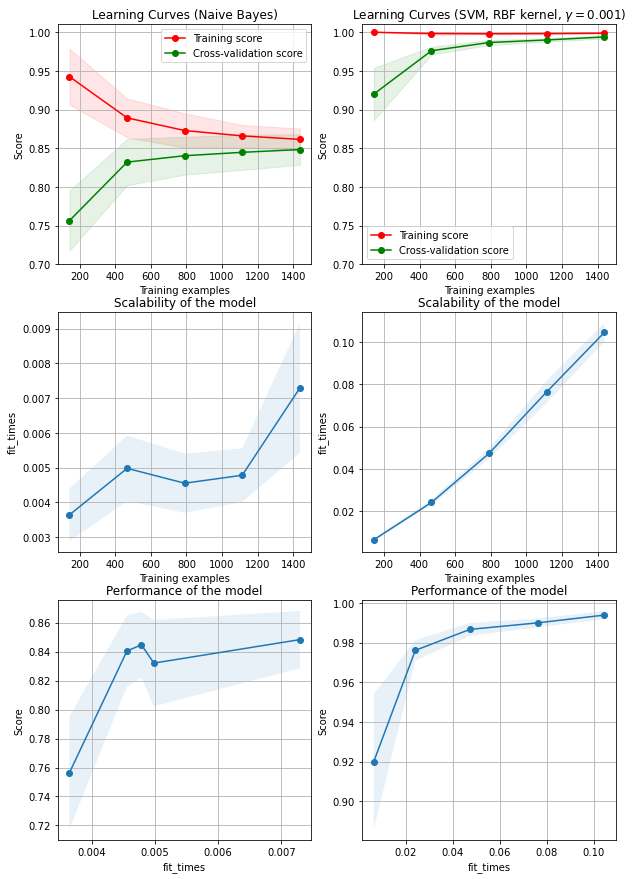

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(10, 15))

X, y = load_digits(return_X_y=True)

title = "Learning Curves (Naive Bayes)"
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(
    estimator, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(
    estimator, title, X, y, axes=axes[:, 1], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

plt.show()

<h1> Hyperparameter tuning </h1>

First we find the optimal hyperparameters for the 3 algorithms: MLP, RF and GB. 
We start with the 60-20-20 Train-Test validation ratio

####  For Train Test Validation1: Ratio (60-20-20)

In [30]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

<h4> ML Algorithms </h4>



<h4> Multilayer Perceptron </h4>

In [31]:
mlp = MLPClassifier()
parameters = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

cv1 = GridSearchCV(mlp, parameters, cv=5)
cv1.fit(tr_features, tr_labels.values.ravel())

print_results(cv1)

/Users/taswarkarim/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/taswarkarim/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/taswarkarim/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/taswarkarim/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


BEST PARAMS: {'activation': 'logistic', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}

0.317 (+/-0.172) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.366 (+/-0.278) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}
0.361 (+/-0.02) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
0.293 (+/-0.169) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
0.439 (+/-0.406) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}
0.312 (+/-0.161) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}
0.42 (+/-0.152) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.405 (+/-0.303) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}
0.356 (+/-0.153) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'lea

/Users/taswarkarim/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


The best parameter seems to be the logistic multilayer percetpron with constant learning rate with a 100 hidden layer size parameter.

In [32]:
best_random_grid1=cv1.best_estimator_
y_pred1=best_random_grid1.predict(X_test1)
print(confusion_matrix(y_test1,y_pred1))

[[32  0  0]
 [ 9  0  0]
 [27  0  0]]


In [33]:
print("Accuracy Score {}".format(accuracy_score(y_test1,y_pred1)))

Accuracy Score 0.47058823529411764


In [34]:
print("Classification report: {}".format(classification_report(y_test1,y_pred1)))

Classification report:               precision    recall  f1-score   support

      Adelie       0.47      1.00      0.64        32
   Chinstrap       0.00      0.00      0.00         9
      Gentoo       0.00      0.00      0.00        27

    accuracy                           0.47        68
   macro avg       0.16      0.33      0.21        68
weighted avg       0.22      0.47      0.30        68



/Users/taswarkarim/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/taswarkarim/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/taswarkarim/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
X=tr_features
y=tr_labels.values.ravel()

/Users/taswarkarim/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/taswarkarim/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/taswarkarim/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/taswarkarim/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


<module 'matplotlib.pyplot' from '/Users/taswarkarim/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

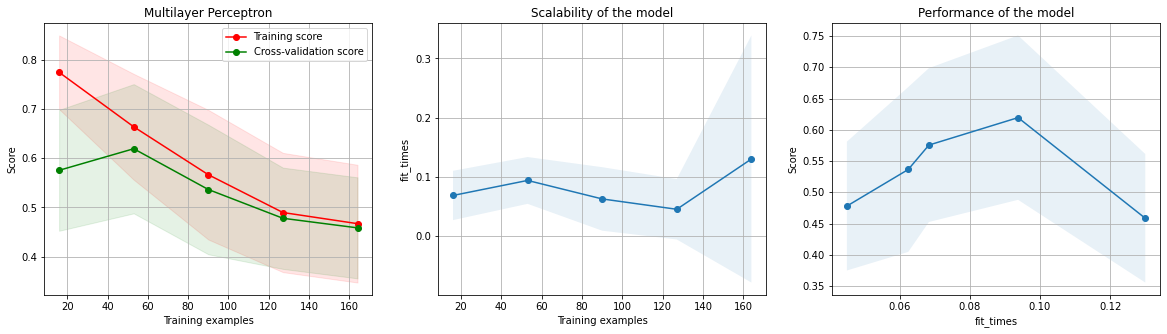

In [36]:
plot_learning_curve(best_random_grid1, "Multilayer Perceptron", X, y, axes=None, ylim=None, cv=5)

Scikit model above shows the training score and cross-validation score against the number of training examples for Multilayer Perceptron

In [37]:
joblib.dump(cv1.best_estimator_, './MLP_model.pkl')

['./MLP_model.pkl']

<h4> Random Forest Classifier </h4>

In [101]:
rf = RandomForestClassifier()
parameters = { 'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv2 = GridSearchCV(rf, parameters, cv=5)
cv2.fit(tr_features, tr_labels.values.ravel())

print_results(cv2)

BEST PARAMS: {'max_depth': 8, 'n_estimators': 50}

0.951 (+/-0.069) for {'max_depth': 2, 'n_estimators': 5}
0.976 (+/-0.044) for {'max_depth': 2, 'n_estimators': 50}
0.98 (+/-0.037) for {'max_depth': 2, 'n_estimators': 250}
0.971 (+/-0.057) for {'max_depth': 4, 'n_estimators': 5}
0.985 (+/-0.024) for {'max_depth': 4, 'n_estimators': 50}
0.98 (+/-0.037) for {'max_depth': 4, 'n_estimators': 250}
0.976 (+/-0.0) for {'max_depth': 8, 'n_estimators': 5}
0.99 (+/-0.024) for {'max_depth': 8, 'n_estimators': 50}
0.99 (+/-0.024) for {'max_depth': 8, 'n_estimators': 250}
0.98 (+/-0.02) for {'max_depth': 16, 'n_estimators': 5}
0.98 (+/-0.037) for {'max_depth': 16, 'n_estimators': 50}
0.99 (+/-0.024) for {'max_depth': 16, 'n_estimators': 250}
0.971 (+/-0.048) for {'max_depth': 32, 'n_estimators': 5}
0.985 (+/-0.024) for {'max_depth': 32, 'n_estimators': 50}
0.985 (+/-0.024) for {'max_depth': 32, 'n_estimators': 250}
0.956 (+/-0.095) for {'max_depth': None, 'n_estimators': 5}
0.985 (+/-0.024) for {'

It seems like the random forest classifier algorithm has a very good learning rate with hyperparameters set to max depth of 8 and 250 n_estimators

In [39]:
best_random_grid2=cv2.best_estimator_
y_pred2=best_random_grid2.predict(X_test1)
print(confusion_matrix(y_test1,y_pred2))

[[31  1  0]
 [ 0  9  0]
 [ 0  0 27]]


In [40]:
print("Accuracy Score {}".format(accuracy_score(y_test1,y_pred2)))

Accuracy Score 0.9852941176470589


In [41]:
print("Classification report: {}".format(classification_report(y_test1,y_pred2)))

Classification report:               precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        32
   Chinstrap       0.90      1.00      0.95         9
      Gentoo       1.00      1.00      1.00        27

    accuracy                           0.99        68
   macro avg       0.97      0.99      0.98        68
weighted avg       0.99      0.99      0.99        68



In [42]:
X=tr_features
y=tr_labels.values.ravel()

<module 'matplotlib.pyplot' from '/Users/taswarkarim/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

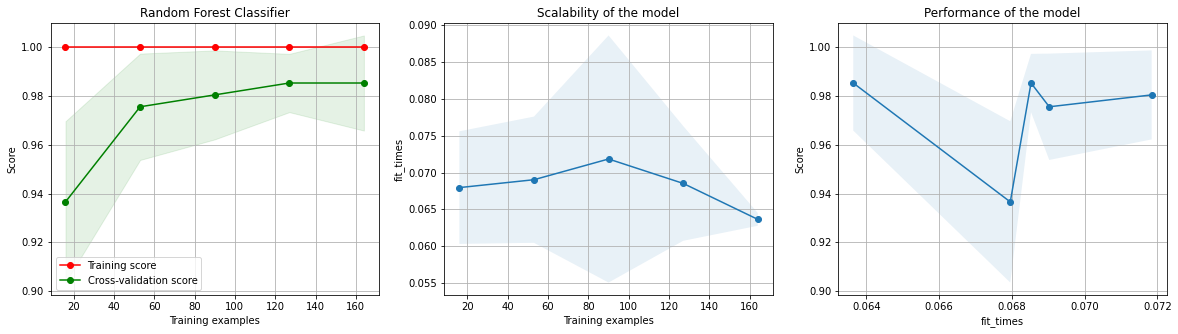

In [43]:
plot_learning_curve(best_random_grid2, "Random Forest Classifier", X, y, axes=None, ylim=None, cv=5)

In [44]:
joblib.dump(cv2.best_estimator_, './RF_model.pkl')

['./RF_model.pkl']

<h4> Gradient Boosting Classifier </h4>

In [45]:
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

cv3 = GridSearchCV(gb, parameters, cv=5)
cv3.fit(tr_features, tr_labels.values.ravel())


print_results(cv3)

BEST PARAMS: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}

0.424 (+/-0.024) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.937 (+/-0.073) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.976 (+/-0.031) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.98 (+/-0.02) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.483 (+/-0.249) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.976 (+/-0.044) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.98 (+/-0.037) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.985 (+/-0.024) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.483 (+/-0.249) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.976 (+/-0.031) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.976 (+/-0.031) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.976 (+/-0.031) for {'learning_rat

In [46]:
best_random_grid3=cv3.best_estimator_
y_pred3=best_random_grid3.predict(X_test1)
print(confusion_matrix(y_test1,y_pred3))

[[31  1  0]
 [ 0  9  0]
 [ 0  0 27]]


In [47]:
print("Accuracy Score {}".format(accuracy_score(y_test1,y_pred3)))

Accuracy Score 0.9852941176470589


In [48]:
print("Classification report: {}".format(classification_report(y_test1,y_pred3)))

Classification report:               precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        32
   Chinstrap       0.90      1.00      0.95         9
      Gentoo       1.00      1.00      1.00        27

    accuracy                           0.99        68
   macro avg       0.97      0.99      0.98        68
weighted avg       0.99      0.99      0.99        68



In [49]:
X=tr_features
y=tr_labels.values.ravel()

<module 'matplotlib.pyplot' from '/Users/taswarkarim/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

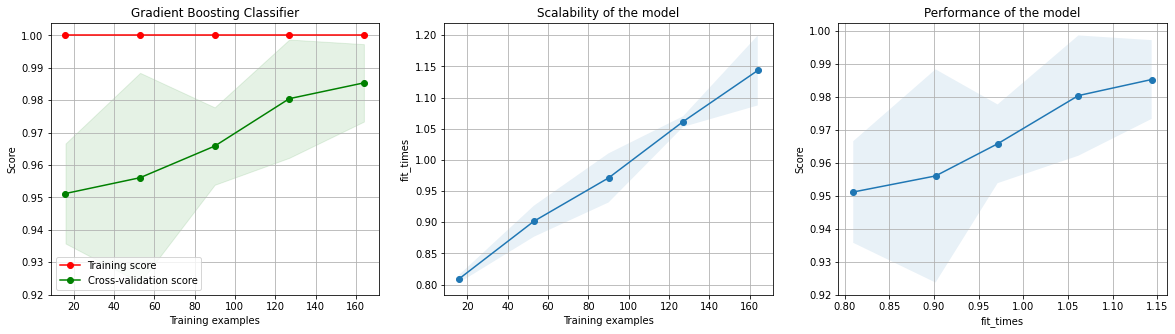

In [50]:
plot_learning_curve(best_random_grid3, "Gradient Boosting Classifier", X, y, axes=None, ylim=None, cv=5)

In [51]:
joblib.dump(cv3.best_estimator_, './GB_model.pkl')

['./GB_model.pkl']

Our accuracy score for Gradient Boosting Classifier has an accuaracy of 98.5% 

### Evaluating the models 

Evaluating the 60-20-20 models

In [90]:
models = {}

for mdl in ['MLP', 'RF', 'GB']:
    models[mdl] = joblib.load('./{}_model.pkl'.format(mdl))


models

{'MLP': MLPClassifier(activation='logistic'),
 'RF': RandomForestClassifier(max_depth=8, n_estimators=50),
 'GB': GradientBoostingClassifier(learning_rate=0.01, n_estimators=500)}

### Evaluate models on the validation set

In [53]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 5)
    precision = round(precision_score(labels, pred, average='micro'), 5)
    recall = round(recall_score(labels, pred, average='micro'), 5)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))

Evaluating the 60-20-20 split models on Validation set

In [54]:
for name, mdl in models.items():
    evaluate_model(name, mdl, val_features, val_labels)


MLP -- Accuracy: 0.46377 / Precision: 0.46377 / Recall: 0.46377 / Latency: 2.2ms
RF -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 16.5ms
GB -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 3.3ms


Evaluating the 60-20-20 split models on Test set

In [93]:
for name, mdl in models.items():
    evaluate_model(name, mdl, test_features, test_labels)

MLP -- Accuracy: 0.47059 / Precision: 0.47059 / Recall: 0.47059 / Latency: 3.8ms
RF -- Accuracy: 0.98529 / Precision: 0.98529 / Recall: 0.98529 / Latency: 18.5ms
GB -- Accuracy: 0.98529 / Precision: 0.98529 / Recall: 0.98529 / Latency: 18.1ms


###  For Train Test Validation 2: Ratio (80-10-10)

#### Starting with RandomForestClassifer

In [55]:
rf = RandomForestClassifier()
parameters = { 'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv4 = GridSearchCV(rf, parameters, cv=5)
cv4.fit(tr_features2, tr_labels2.values.ravel())

print_results(cv4)

BEST PARAMS: {'max_depth': 16, 'n_estimators': 5}

0.953 (+/-0.049) for {'max_depth': 2, 'n_estimators': 5}
0.978 (+/-0.015) for {'max_depth': 2, 'n_estimators': 50}
0.978 (+/-0.015) for {'max_depth': 2, 'n_estimators': 250}
0.971 (+/-0.05) for {'max_depth': 4, 'n_estimators': 5}
0.982 (+/-0.0) for {'max_depth': 4, 'n_estimators': 50}
0.982 (+/-0.023) for {'max_depth': 4, 'n_estimators': 250}
0.971 (+/-0.05) for {'max_depth': 8, 'n_estimators': 5}
0.985 (+/-0.028) for {'max_depth': 8, 'n_estimators': 50}
0.985 (+/-0.028) for {'max_depth': 8, 'n_estimators': 250}
0.993 (+/-0.018) for {'max_depth': 16, 'n_estimators': 5}
0.993 (+/-0.018) for {'max_depth': 16, 'n_estimators': 50}
0.985 (+/-0.028) for {'max_depth': 16, 'n_estimators': 250}
0.974 (+/-0.018) for {'max_depth': 32, 'n_estimators': 5}
0.985 (+/-0.028) for {'max_depth': 32, 'n_estimators': 50}
0.993 (+/-0.018) for {'max_depth': 32, 'n_estimators': 250}
0.989 (+/-0.018) for {'max_depth': None, 'n_estimators': 5}
0.985 (+/-0.028) 

In [56]:
cv4.best_params_

{'max_depth': 16, 'n_estimators': 5}

In [70]:
best_random_grid4=cv4.best_estimator_

In [58]:
y_pred4=best_random_grid4.predict(X_test2)
print(confusion_matrix(y_test2,y_pred4))

[[17  0  0]
 [ 0  7  0]
 [ 0  0 10]]


In [59]:
print("Accuracy Score {}".format(accuracy_score(y_test2,y_pred4)))

Accuracy Score 1.0


In [60]:
print("Classification report: {}".format(classification_report(y_test2,y_pred4)))

Classification report:               precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        17
   Chinstrap       1.00      1.00      1.00         7
      Gentoo       1.00      1.00      1.00        10

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



<module 'matplotlib.pyplot' from '/Users/taswarkarim/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

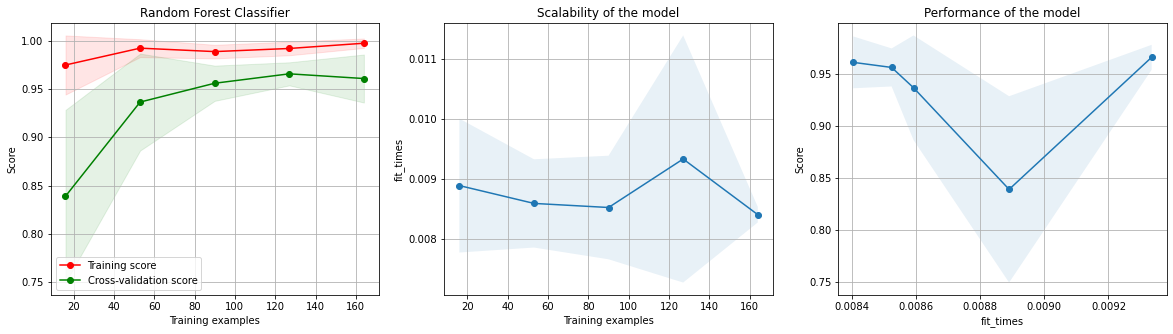

In [61]:
plot_learning_curve(best_random_grid4, "Random Forest Classifier", X, y, axes=None, ylim=None, cv=5)

In [84]:
joblib.dump(cv4.best_estimator_, './RF2_model.pkl')

['./RF2_model.pkl']

### MLP Classifier

In [62]:
mlp = MLPClassifier()
parameters = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

clf2 = GridSearchCV(mlp, parameters, cv=5)
clf2.fit(tr_features2, tr_labels2.values.ravel())


print_results(clf2)

/Users/taswarkarim/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/taswarkarim/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/taswarkarim/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/taswarkarim/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


BEST PARAMS: {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}

0.235 (+/-0.138) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.404 (+/-0.253) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}
0.289 (+/-0.211) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
0.333 (+/-0.203) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
0.403 (+/-0.067) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}
0.333 (+/-0.242) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}
0.473 (+/-0.222) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.488 (+/-0.191) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}
0.432 (+/-0.165) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'lea

/Users/taswarkarim/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [63]:
clf2.fit(tr_features2, tr_labels2.values.ravel())

/Users/taswarkarim/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/taswarkarim/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/taswarkarim/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/taswarkarim/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['relu', 'tanh', 'logistic'],
                         'hidden_layer_sizes': [(10,), (50,), (100,)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive']})

In [79]:
best_random_grid5=clf2.best_estimator_

In [68]:
best_random_grid5

MLPClassifier(activation='logistic', hidden_layer_sizes=(50,),
              learning_rate='invscaling')

In [69]:
y_pred5=best_random_grid5.predict(X_test2)
print(confusion_matrix(y_test2,y_pred5))

[[17  0  0]
 [ 7  0  0]
 [10  0  0]]


In [71]:
print("Accuracy Score {}".format(accuracy_score(y_test2,y_pred5)))

Accuracy Score 0.5


In [72]:
print("Classification report: {}".format(classification_report(y_test2,y_pred5)))

Classification report:               precision    recall  f1-score   support

      Adelie       0.50      1.00      0.67        17
   Chinstrap       0.00      0.00      0.00         7
      Gentoo       0.00      0.00      0.00        10

    accuracy                           0.50        34
   macro avg       0.17      0.33      0.22        34
weighted avg       0.25      0.50      0.33        34



/Users/taswarkarim/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/taswarkarim/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/taswarkarim/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [73]:
X=tr_features
y=tr_labels.values.ravel()

/Users/taswarkarim/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/taswarkarim/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/taswarkarim/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/taswarkarim/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


<module 'matplotlib.pyplot' from '/Users/taswarkarim/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

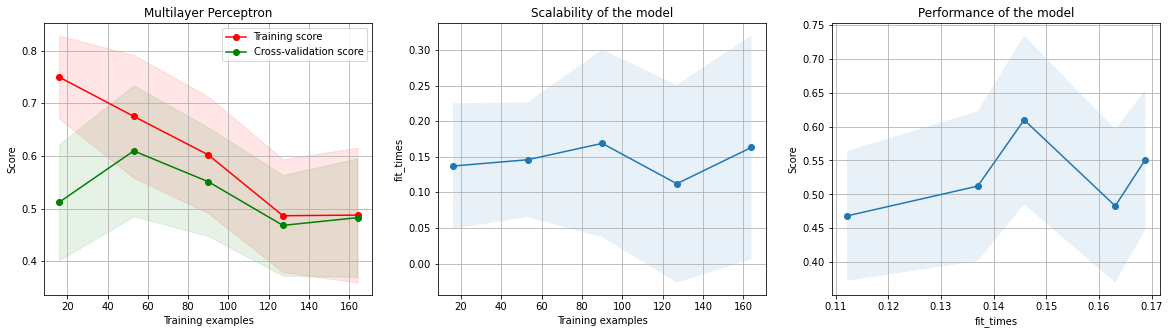

In [74]:
plot_learning_curve(best_random_grid5, "Multilayer Perceptron", X, y, axes=None, ylim=None, cv=5)

In [85]:
joblib.dump(clf2.best_estimator_, './MLP2_model.pkl')

['./MLP2_model.pkl']

### Gradient Boosting Method

#### 80-10-10

In [75]:
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

cv5 = GridSearchCV(gb, parameters, cv=5)
cv5.fit(tr_features2, tr_labels2.values.ravel())


print_results(cv5)

BEST PARAMS: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}

0.494 (+/-0.288) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.948 (+/-0.06) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.971 (+/-0.03) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.982 (+/-0.023) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.711 (+/-0.294) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.982 (+/-0.023) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.989 (+/-0.03) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.989 (+/-0.03) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.719 (+/-0.301) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.989 (+/-0.029) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.989 (+/-0.029) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.989 (+/-0.029) for {'learning_rate'

In [77]:
best_random_grid6=cv5.best_estimator_


In [78]:
y_pred6=best_random_grid6.predict(X_test2)
print(confusion_matrix(y_test2,y_pred6))

[[16  1  0]
 [ 0  7  0]
 [ 0  0 10]]


In [80]:
print("Accuracy Score {}".format(accuracy_score(y_test2,y_pred6)))

Accuracy Score 0.9705882352941176


In [81]:
print("Classification report: {}".format(classification_report(y_test2,y_pred6)))

Classification report:               precision    recall  f1-score   support

      Adelie       1.00      0.94      0.97        17
   Chinstrap       0.88      1.00      0.93         7
      Gentoo       1.00      1.00      1.00        10

    accuracy                           0.97        34
   macro avg       0.96      0.98      0.97        34
weighted avg       0.97      0.97      0.97        34



In [82]:
X=tr_features
y=tr_labels.values.ravel()

<module 'matplotlib.pyplot' from '/Users/taswarkarim/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

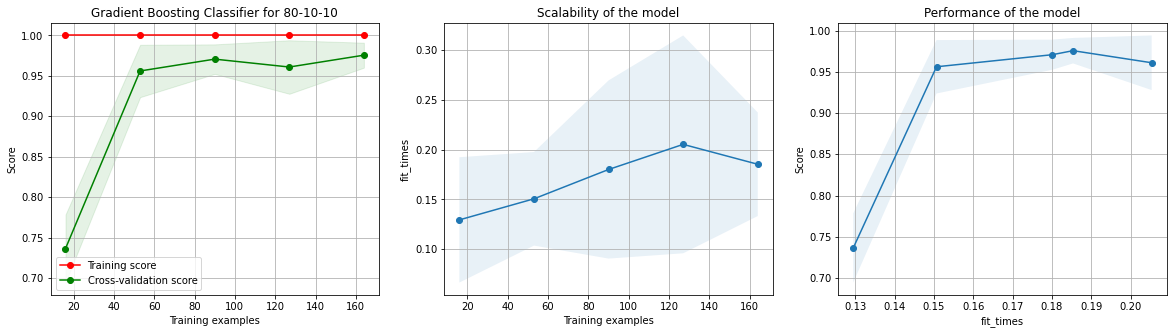

In [83]:
plot_learning_curve(best_random_grid6, "Gradient Boosting Classifier for 80-10-10", X, y, axes=None, ylim=None, cv=5)

In [86]:
joblib.dump(cv5.best_estimator_, './GB2_model.pkl')

['./GB2_model.pkl']

### Evaluating models for 80-10-10 Split ratio

In [88]:
models2 = {}

for mdl in ['MLP2', 'RF2', 'GB2']:
    models2[mdl] = joblib.load('./{}_model.pkl'.format(mdl))


models2

{'MLP2': MLPClassifier(activation='logistic', hidden_layer_sizes=(50,),
               learning_rate='invscaling'),
 'RF2': RandomForestClassifier(max_depth=16, n_estimators=5),
 'GB2': GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=50)}

Evaluating the 80-10-10 split models on Validation set

In [91]:
for name, mdl in models2.items():
    evaluate_model(name, mdl, val_features2, val_labels2)


MLP2 -- Accuracy: 0.51429 / Precision: 0.51429 / Recall: 0.51429 / Latency: 17.8ms
RF2 -- Accuracy: 0.97143 / Precision: 0.97143 / Recall: 0.97143 / Latency: 9.3ms
GB2 -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 7.8ms


Evaluating the 80-10-10 split models on Test set

In [92]:
for name, mdl in models2.items():
    evaluate_model(name, mdl, test_features2, test_labels2)

MLP2 -- Accuracy: 0.5 / Precision: 0.5 / Recall: 0.5 / Latency: 2.7ms
RF2 -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 7.3ms
GB2 -- Accuracy: 0.97059 / Precision: 0.97059 / Recall: 0.97059 / Latency: 3.3ms


In [100]:
print("MLP 60-20-20 Accuracy Score {}".format(accuracy_score(y_test1,y_pred1)))
print("RF 60-20-20 Accuracy Score {}".format(accuracy_score(y_test1,y_pred2)))
print("GB 60-20-20 Accuracy Score {}".format(accuracy_score(y_test1,y_pred3)))
print("RF 80-10-10 Accuracy Score {}".format(accuracy_score(y_test2,y_pred4)))
print("MLP 80-10-10 Accuracy Score {}".format(accuracy_score(y_test2,y_pred5)))
print("GB 80-10-10 Accuracy Score {}".format(accuracy_score(y_test2,y_pred6)))

MLP 60-20-20 Accuracy Score 0.47058823529411764
RF 60-20-20 Accuracy Score 0.9852941176470589
GB 60-20-20 Accuracy Score 0.9852941176470589
RF 80-10-10 Accuracy Score 1.0
MLP 80-10-10 Accuracy Score 0.5
GB 80-10-10 Accuracy Score 0.9705882352941176


#### Comparing Accuracies

In [102]:
for name, mdl in models.items():
    evaluate_model(name, mdl, val_features, val_labels)

MLP -- Accuracy: 0.46377 / Precision: 0.46377 / Recall: 0.46377 / Latency: 13.2ms
RF -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 20.3ms
GB -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 13.9ms


In [103]:
for name, mdl in models2.items():
    evaluate_model(name, mdl, val_features2, val_labels2)

MLP2 -- Accuracy: 0.51429 / Precision: 0.51429 / Recall: 0.51429 / Latency: 11.2ms
RF2 -- Accuracy: 0.97143 / Precision: 0.97143 / Recall: 0.97143 / Latency: 6.4ms
GB2 -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 6.7ms


### Conclusion

##### From the result above, we can see that the 60-20-20 split had a better accuracy compared to 80-10-10. However, when it came to latency - the latter seems to be performing better as it ran significantly faster for the Random Forest & Gradient Boosting model. Weighing everything the 80-10-10 split ratio seems to be better.